In [7]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
N_atoms = 6
t = 8
J = 50
T = np.pi/J
W = J/np.pi*(1-0.1)
W_off = 2

tau = 0.8
steps = 100000
times = np.linspace(0.0, t, steps)

############################################
############## non-interacting hamiltonian
rand_list = list((np.random.rand(N_atoms)-1/2)*2*W + W_off)
print(rand_list)
matrxs = [qp.sigmax()] + [qp.identity(2)]*(N_atoms-1)
H0 = qp.tensor(matrxs) * rand_list[0]
for i in range(1, N_atoms):
    matrxs = [matrxs[-1]] + matrxs[:-1]
    H0 = H0 + qp.tensor(matrxs) * rand_list[i]

############################################
############## interaction hemiltonian
matrxs = [(J**.5)*qp.sigmaz(), (J**.5)*qp.sigmaz()] + [qp.identity(2)]*(N_atoms-2)
H_int = qp.tensor(matrxs)
for i in range(1, N_atoms-1):
    matrxs = [matrxs[-1]] + matrxs[:-1]
    H_int = H_int + qp.tensor(matrxs)
H_int = H_int

############################################
############## initial state
_as = np.random.choice([-1,1], N_atoms)

print("initial state: ", _as)
list_ = [(qp.identity(2)+a*qp.sigmaz())/2 for a in _as]
psi0 = qp.tensor(list_)

############################################
############## jump operators
matrxs = [tau*qp.sigmam()] + [qp.identity(2)]*(N_atoms-1)
Jump_ops = [qp.tensor(matrxs)]
for i in range(1, N_atoms):
    matrxs = [matrxs[-1]] + matrxs[:-1]
    Jump_ops = Jump_ops + [qp.tensor(matrxs)]
Jump_ops = []

############################################
############## observables
matrxs = [qp.sigmaz()] + [qp.identity(2)]*(N_atoms-1)
observables = []
for i in range(0, N_atoms):
    observables = observables + [qp.tensor(matrxs)]
    matrxs = [matrxs[-1]] + matrxs[:-1]

############################################
############## floquet hamiltonians
def H0_coeff(t, args):
    if t % T < T/2:
        return 1
    return 0

def H_int_coeff(t, args):
    if t % T < T/2:
        return 0
    return 1

############################################
############## master equation evolution

res = qp.mesolve(H=[[H0, H0_coeff], [H_int, H_int_coeff]], rho0=psi0, tlist=times, c_ops=Jump_ops, e_ops=observables, args={})

[np.float64(12.947326273589146), np.float64(-8.05062140366415), np.float64(-0.6822609148404428), np.float64(-7.514683617596454), np.float64(-10.553696423347121), np.float64(5.550893860536764)]
initial state:  [ 1  1  1 -1  1 -1]


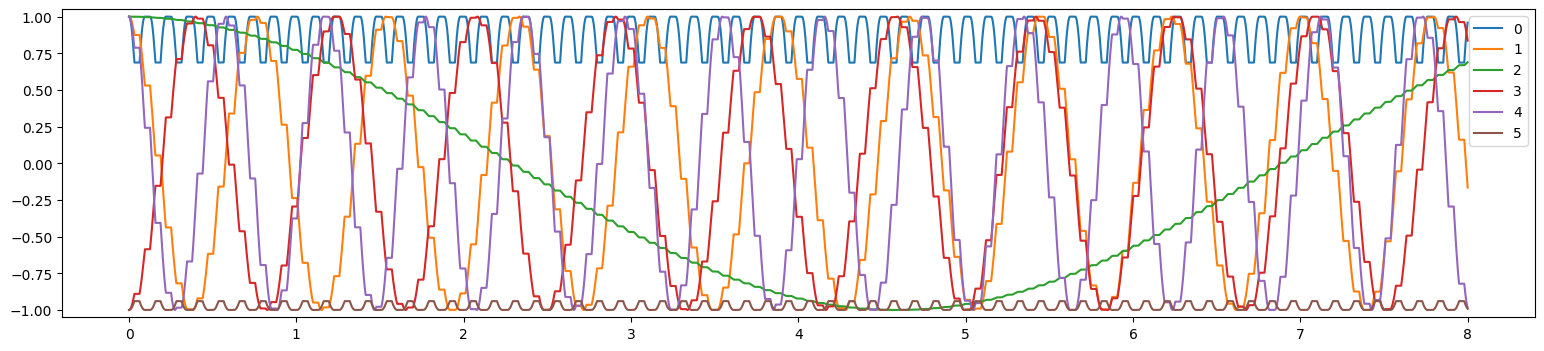

In [9]:
plt.figure(figsize=[19,4])
for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.ylim([-1.05,1.05])
#plt.xlim([6,7])
plt.show()